# Olist Store |  E-Commerce Brasilero

<p>Este es un conjunto de datos públicos del e-commerce brasileño Olist Store. El conjunto de datos tiene información de 100k pedidos entre los años 2016 a 2018 realizados en múltiples mercados en Brasil. Sus características permiten ver un pedido desde múltiples dimensiones: desde el estado del pedido, el precio, el pago y el rendimiento de la carga hasta la ubicación del cliente, los atributos del producto y finalmente las revisiones escritas por los clientes. También hay un conjunto de datos de geolocalización que relaciona los códigos postales brasileños con las coordenadas latitud y longitud.</p>

<p>Este conjunto de datos fue generosamente proporcionado por Olist Store, uno de los e-commerce más grandes del mercado brasileño. Olist conecta a pequeñas empresas de todo Brasil a canales sin problemas y con un solo contrato. Esos comerciantes pueden vender sus productos a través de la tienda Olist y enviarlos directamente a los clientes utilizando socios de logística Olist.</p>

<p>Después de que un cliente compra el producto en Olist Store, se notifica a un vendedor para cumplir ese pedido. Una vez que el cliente recibe el producto, o la fecha de entrega estimada de entrega, el cliente recibe una encuesta de satisfacción por correo electrónico donde puede dar una nota para la experiencia de compra y escribir algunos comentarios.</p>

<p> Ejemplo de un producto en la pagina de Olist</p>
<img src="example_product.png"  height="600">

<p>El esquema de la base de datos lo podemos ver a continuacion:</p>
<img src="Database_Schema.png"  height="600">

## Importando Librerias

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from utils import Load 

## Leyendo los datasets

In [44]:

path = "./data/e-comerce_Olist_dataset/"
path2 = './data/Olist_Funnel_marketing/'

load = Load(path)
load2 = Load(path2)

data_dict = load.load_from_csv(path)

marketing_dict = load2.load_from_csv(path2)


In [4]:
data_dict.keys()

dict_keys(['olist_customers_dataset', 'olist_geolocation_dataset', 'olist_orders_dataset', 'olist_order_items_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset', 'olist_products_dataset', 'olist_sellers_dataset', 'product_category_name_translation'])

In [5]:


geolocalizacion = pd.read_csv('data\e-comerce_Olist_dataset\olist_geolocation_dataset.csv')
items = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
metodo_de_pago = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_payments_dataset.csv')
reviews = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_reviews_dataset.csv', parse_dates=['review_creation_date', 'review_answer_timestamp'])
ordenes = pd.read_csv('data\e-comerce_Olist_dataset\olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
productos = pd.read_csv('data\e-comerce_Olist_dataset\olist_products_dataset.csv')
vendedores = pd.read_csv('data\e-comerce_Olist_dataset\olist_sellers_dataset.csv')
productos_info = pd.read_csv('data\e-comerce_Olist_dataset\product_category_name_translation.csv')

marketing_ofertas_cerradas = pd.read_csv("data\Olist_Funnel_marketing\olist_closed_deals_dataset.csv", parse_dates=['won_date']) 
marketing_qualified_leads = pd.read_csv("data\Olist_Funnel_marketing\olist_marketing_qualified_leads_dataset.csv", parse_dates=['first_contact_date'])


## Explorando los datasets

### Clientes

<p>Este conjunto de datos tiene información sobre el cliente y su ubicación. Usarlo para identificar clientes únicos en el dataset de pedidos/ordenes y para encontrar la ubicación de entrega de pedidos.</p>
<p>En este sistema, cada pedido se asigna a un cliente único. Esto significa que el mismo cliente obtendrá diferentes ID para diferentes pedidos. El propósito de tener un cliente_unique_id en el conjunto de datos es permitir identificar a los clientes que hicieron recompras en la tienda. De lo contrario, encontraría que cada pedido tiene un cliente diferente asociado.</p>

La tabla de `Clientes` comprende las siguientes columnas:

`customer_id`: clave de la orden de compra del dataset. Cada orden tiene un unico customer_id.<br>
`customer_unique_id`: Identificador unico del cliente. <br>
`customer_zip_code_prefix`: Primeros cinco dígitos del código postal del cliente.<br>
`customer_city`: Nombre de la ciudad del cliente.<br>
`customer_state`: Nombre del estado donde se encuentra el cliente<br>

In [26]:
clientes = data_dict['olist_customers_dataset']
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [8]:
clientes.isnull().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

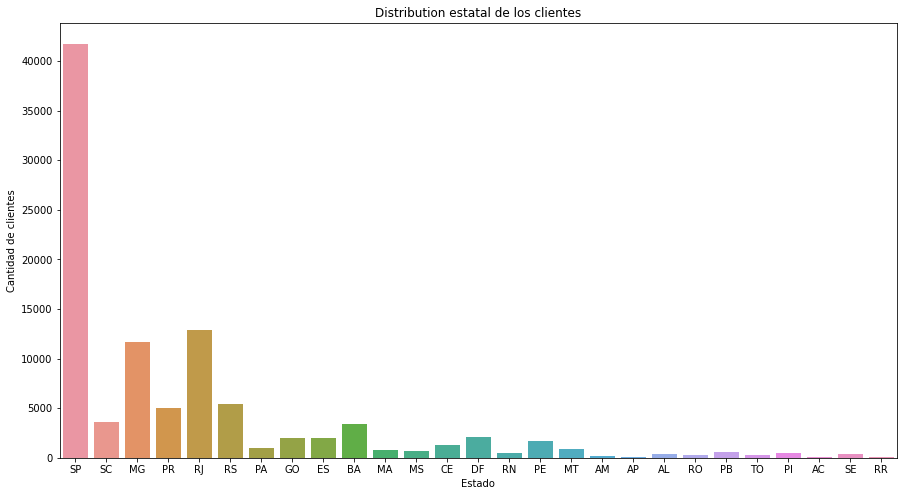

In [9]:
# Grafiquemos
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=clientes)
plt.title('Distribution estatal de los clientes')
plt.xlabel('Estado')
plt.ylabel('Cantidad de clientes')
plt.show()

In [10]:
clientes.customer_city.nunique() # nunique Count number of distinct elements in specified axis.

4119

In [11]:
clientes.customer_state.nunique()

27

In [12]:
clientes.customer_state.value_counts()[0]/clientes.shape[0]

0.41980671956235355

El 42% de los clientes se encuentran en el estado de SP (Sao Pablo) y el resto se encuentra distribuido en los demas 26 estados que registran ventas

### Geolocalizacion

Este conjunto de datos tiene información con códigos postales brasileños y sus coordenadas LAT/LONG. Usarlo para trazar mapas y encontrar distancias entre vendedores y clientes.

La tabla de `Geolocalizacion` comprende las siguientes columnas:

`geolocation_zip_code_prefix`: Primeros cinco dígitos del código postal del cliente <br>
`geolocation_lat`: latidud <br>
`geolocation_lng`: Longitud <br>
`geolocation_city`: Ciudad <br>
`geolocation_state`: Estado <br>

In [28]:
geolocalizacion = data_dict['olist_geolocation_dataset']

In [29]:
geolocalizacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
geolocalizacion.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


##### Chequear Outliers.
La mayor parte del país se halla dentro del hemisferio sur, entre los paralelos 5.5 de latitud N, y los -34 de latitud S; y entre los meridianos que señalan los -32 y los -74 de longitud.

In [16]:
# Chequeamos latitud
out_latylon = geolocalizacion [(geolocalizacion.geolocation_lat > 5.5)| (geolocalizacion.geolocation_lat < -34)|(geolocalizacion.geolocation_lng > -32 )| (geolocalizacion.geolocation_lng  < -74)]
out_latylon.shape

(31, 5)

Hay outliers... trabajarlos

In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="pi_1_henry")
location = geolocator.geocode('fernando de noronha')
location

Location(Parque Nacional Marinho de Fernando de Noronha, Fernando de Noronha, Região Geográfica Imediata do Recife, Região Geográfica Intermediária do Recife, Pernambuco, Região Nordeste, 53990-000, Brasil, (-3.8545643, -32.37861623300567, 0.0))

In [18]:
print((location.latitude, location.longitude))

(-3.8545643, -32.37861623300567)


In [25]:
# Trabajamos los outliers
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='measurements')
location_city = out_latylon.geolocation_city.values

index = out_latylon.index
for i in range(0,len(location_city)):
    location = geolocator.geocode(location_city[i]+', Brasil')
    try:
        geolocalizacion.loc[geolocalizacion.index==index[i], 'geolocation_lng'] = location.longitude
        geolocalizacion.loc[geolocalizacion.index==index[i], 'geolocation_lat'] = location.latitude
    except:
        try:
            location = geolocator.geocode(location_city[i])
            geolocalizacion.loc[geolocalizacion.index==index[i], 'geolocation_lng'] = location.longitude
            geolocalizacion.loc[geolocalizacion.index==index[i], 'geolocation_lat'] = location.latitude
        except:
            geolocalizacion.loc[geolocalizacion.index==index[i], 'geolocation_lat'] = geolocalizacion[geolocalizacion.geolocation_city==location_city[i]].geolocation_lat.mean()
            geolocalizacion.loc[geolocalizacion.index==index[i], 'geolocation_lng'] = geolocalizacion[geolocalizacion.geolocation_city==location_city[i]].geolocation_lng.mean()

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=santa+maria%2C+Brasil&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [ ]:
geolocalizacion.isnull().any()

In [ ]:
geolocalizacion.to_csv('data\e-comerce_Olist_dataset\olist_geolocation_dataset_coregido.csv', index_label=False)

In [ ]:
geolocalizacion_corr = pd.read_csv('data\e-comerce_Olist_dataset\olist_geolocation_dataset_coregido.csv')
geolocalizacion_corr.head(3)

In [ ]:
geolocalizacion_corr.info()

### Items - Elementos de cada pedido

Este dataset incluye datos sobre los elementos comprados dentro de cada pedido.<br>

La tabla de `Items` comprende las siguientes columnas:<br>

`order_id`: Identificador unico de la orden de compra. <br>
`order_item_id`: número secuencial de identificación de elementos incluidos en la misma orden. <br>
`product_id`: Identificador unico del producto <br>
`seller_id`: Identificador unico del vendedor <br>
`shipping_limit_date`: Muestra la fecha de límite de envío del vendedor para manejar el pedido con el socio logístico. <br>
`price`: Precio del item. <br>
`freight_value`: valor de flete (si un pedido tiene más de un elemento, el valor del flete se divide entre los elementos) <br>

In [30]:
items = data_dict['olist_order_items_dataset']

In [31]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
items.head(3) 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [ ]:
items.isnull().any()

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

In [ ]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


El 75% de los precios esta por debajo de R$134.900000. 

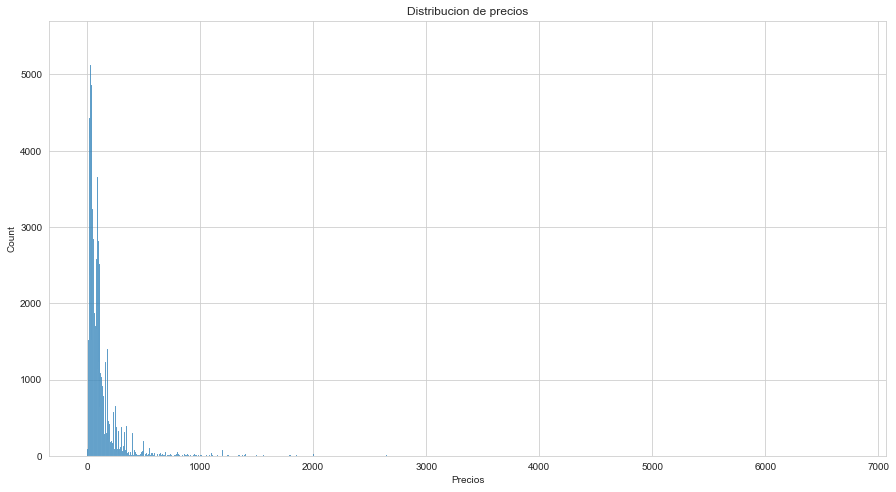

In [ ]:
# Plotear la distribucion de los precios
plt.figure(figsize=(15,8))
sns.histplot(x='price', data=items)
plt.title('Distribucion de precios')
plt.xlabel('Precios')
plt.show()

### Medio de pago

Este dataset incluye datos sobre las opciones de pago de los pedidos.<br>

La tabla de `Metodo de Pago` comprende las siguientes columnas: <br>

`order_id`: Identificador unico de la orden de compra. <br>
`payment_sequential`: Un cliente puede pagar un pedido con más de un método de pago. Si lo hace, se creará una secuencia. <br>
`payment_type`: Metodo de pago elegido por el cliente <br>
`payment_installments`: Número de cuotas elegidas por el cliente. <br>
`payment_value`: valor de la transacción. <br>


In [32]:
metodo_de_pago = data_dict['olist_order_payments_dataset']

In [33]:
metodo_de_pago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
metodo_de_pago.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [ ]:
metodo_de_pago.isnull().any()

order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool

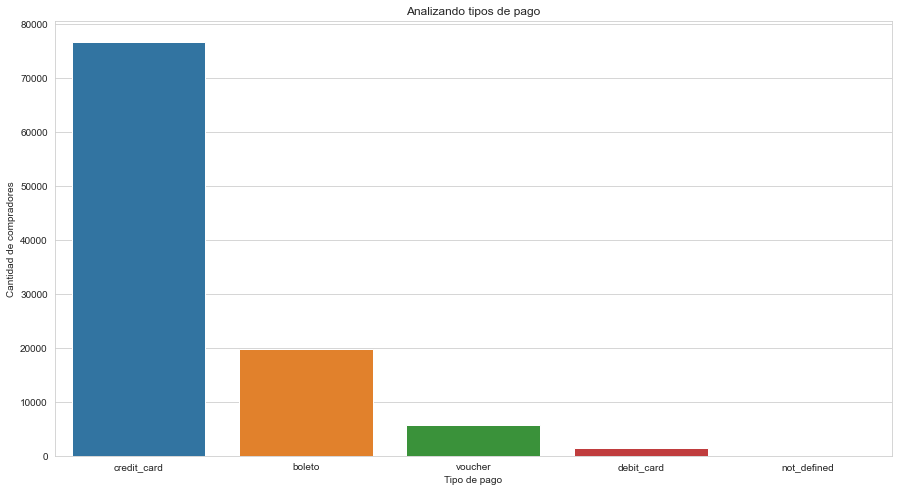

In [ ]:
# Grafiquemos
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=metodo_de_pago)
plt.title('Analizando tipos de pago')
plt.xlabel('Tipo de pago')
plt.ylabel('Cantidad de compradores')
plt.show()

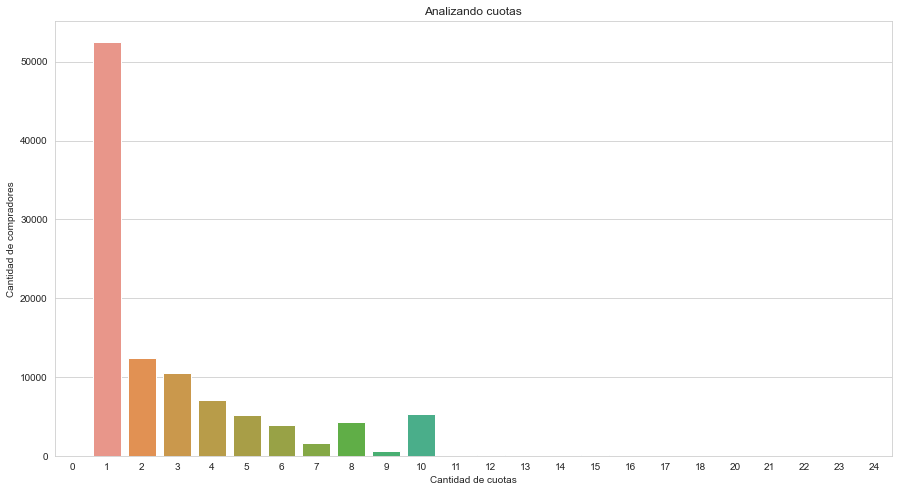

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='payment_installments', data=metodo_de_pago)
plt.title('Analizando cuotas')
plt.xlabel('Cantidad de cuotas')
plt.ylabel('Cantidad de compradores')
plt.show()

In [ ]:
metodo_de_pago.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


El 75% de los clientes pago en 4 cuotas o menos y la mayoria de los clientes prefieren pagar en una cuota (el 50.5%)

In [ ]:
(metodo_de_pago.payment_installments.value_counts()[1] / metodo_de_pago.shape[0])*100

50.58044394817396

### Revisiones de los clientes

<p>Después de que un cliente compra el producto en Olist Store, se notifica al vendedor para cumplir ese pedido. Una vez que el cliente recibe el producto, o la fecha de entrega estimada, el cliente recibe una encuesta de satisfacción por correo electrónico donde puede dar una nota para la experiencia de compra y escribir algunos comentarios.</p>

La tabla de `Reviews` comprende las siguientes columnas:<br>

`review_id`: Identificador unico de la revision. <br>
`order_id`: Identificador unico de la orden de compra.<br>
`review_score`: Nota que varía de 1 a 5 dada por el cliente en una encuesta de satisfacción.<br>
`review_comment_title`: Título de comentario de la revisión dejada por el cliente, en portugués.<br>
`review_comment_message`: Mensaje de comentario de la revisión dejada por el cliente, en portugués.<br>
`review_creation_date`: Muestra la fecha en que se envió la encuesta de satisfacción al cliente.<br>
`review_answer_timestamp`: Muestra dia y hora de la encuesta de satisfacción.<br>



In [34]:
reviews = data_dict['olist_order_reviews_dataset']

In [35]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
reviews.head(3)

In [ ]:
reviews.isnull().any()

Faltan muchos datos en el titulo y el mensaje pero tenemos la puntuacion de cada una

In [ ]:
# Grafiquemos
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=reviews)
plt.title('Analizando las revisiones')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de Revisiones')
plt.show()

In [ ]:
reviews.review_score.value_counts()[5]/reviews.shape[0]

In [ ]:
reviews.review_score.value_counts()[1]/reviews.shape[0]

El 57.8% de las revisiones corresponden a 5 y el 11.5% a 1

### Ordenes de compra

Este es el conjunto de datos principal. De cada pedido se puede encontrar toda la otra información.<br>

La tabla de `ordenes` comprende las siguientes columnas:<br>

`order_id`: Identificador unico del orden de compra <br>
`customer_id`:  clave de la orden de compra. Cada orden tiene un unico customer_id.<br>
`order_status`: Referencia del estado de la orden (entregada, enviada, etc).<br>
`order_purchase_timestamp`: Muestra dia y hora de la compra.<br>
`order_approved_at`: Muestra dia y hora del pago aprobado<br>
`order_delivered_carrier_date`: Muestra fecha y hora de entregado el pedido al transportista.<br>
`order_delivered_customer_date`: Muestra la fecha real de entrega del pedido al cliente.<br>
`order_estimated_delivery_date`: Muestra la fecha de entrega estimada que se informó al cliente en el momento de compra.<br>

In [36]:
ordenes = data_dict['olist_orders_dataset']

In [37]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


In [ ]:
ordenes.head(3)

In [ ]:
ordenes.isnull().any()

Evaluar las diferencias entre: 
- Hora de compra y pago aprobado
- pago aprobado y despacho 
- decpacho y entrega
- entrega real y entrega pactada

In [ ]:
ordenes_copy = ordenes.copy()
ordenes_copy["diff_compra_pagoaprobado"] = ordenes_copy.order_approved_at - ordenes_copy.order_purchase_timestamp
ordenes_copy["diff_pagoaprobado_despacho"] = ordenes_copy.order_delivered_carrier_date - ordenes_copy.order_approved_at
ordenes_copy["diff_despacho_entregareal"] = ordenes_copy.order_delivered_customer_date - ordenes_copy.order_delivered_carrier_date 
ordenes_copy["diff_entregareal_entregapactada"] = ordenes_copy.order_estimated_delivery_date - ordenes_copy.order_delivered_customer_date

In [ ]:
print("La diferencia entre la compra y el pago aprobado es de {}".format(ordenes_copy.diff_compra_pagoaprobado.mean()))
print("La diferencia entre el pago aprobado y el despacho es de {}".format(ordenes_copy.diff_pagoaprobado_despacho.mean()))
print("La diferencia entre el despacho y la entrega es de {}".format(ordenes_copy.diff_despacho_entregareal.mean()))
print("La diferencia entre la entrega real y la entrega pactada es de {}".format(ordenes_copy.diff_entregareal_entregapactada.mean()))

In [ ]:
t = ordenes_copy.diff_compra_pagoaprobado.mean()
t.seconds

In [ ]:
ordenes_copy.head(3)

Que hacemos con los nulos??

### Productos

Este dataset incluye datos sobre los productos vendidos por Olist.<br>

La tabla de `Productos` comprende las siguientes columnas:<br>

`product_id`: Identificador unico del producto.<br>
`product_category_name`: Nombre de la categoria del producto, en portugués.<br>
`product_name_length`: Número de caracteres extraídos del nombre del producto.<br>
`product_description_lenght`: Número de caracteres extraídos de la descripción del producto.<br>
`product_photos_qty`: Número de fotos publicadas por el producto.<br>
`product_weight_g`: Peso del producto medido en gramos.<br>
`product_length_cm`: Longitud del producto medida en centímetros.<br>
`product height_cm`: Altura del producto medida en centímetros.<br>
`product_width_cm`: Ancho del producto medido en centímetros.<br>



In [38]:
productos = data_dict['olist_products_dataset']

In [39]:
productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
productos.head()

In [ ]:
productos.isnull().sum()

### Vendedores

Este dataset incluye datos sobre los vendedores que cumplieron los pedidos realizados en Olist. Usarlo para encontrar la ubicación del vendedor e identificar qué vendedor cumplió cada producto.<br>

La tabla de `Productos` comprende las siguientes columnas:<br>

`seller_id`:Identificador unico del vendedor. <br>
`seller_zip_code`: Primeros 5 dígitos de código postal del vendedor. <br>
`seller_city`: Nombre de la ciudad del vendedor. <br>
`seller_state`: Nombre del estado donde vive el vendedor. <br>

In [40]:
vendedores = data_dict['olist_sellers_dataset']

In [41]:
vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
vendedores.isnull().any()

In [ ]:
# Grafiquemos
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', data=vendedores)
plt.title('Distribution estatal de los vendedores')
plt.xlabel('Estado')
plt.ylabel('Cantidad de vendedores')
plt.show()

In [ ]:
vendedores.seller_state.value_counts()[0]/vendedores.shape[0]

In [ ]:
vendedores.seller_state.nunique()

El 59.7% de los vendedores se encuentran en SP (Sao Pablo) y el resto se encuentran distribuidos en los demas 22 estados

### Productos_info

Este dataset traduce las categorias de los productos al inglés. Evaluar si lo necesitamos en español. Usar la api de google translate para eso.

La tabla de `Productos_info` comprende las siguientes columnas:<br>

`product_category_name`: Nombre de categoría en portugués.
`product_name_english`: Nombre de categoría en inglés.

In [42]:
productos_info = data_dict['product_category_name_translation']

In [43]:
productos_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
productos_info.head()

In [ ]:
productos_info.isnull().any()

### Marketing ofertas cerradas

In [46]:
marketing_ofertas_cerradas =  marketing_dict['olist_closed_deals_dataset']

In [47]:
marketing_ofertas_cerradas.head()


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


### Marketing Qualified Leads

In [48]:
marketing_qualified_leads = marketing_dict['olist_marketing_qualified_leads_dataset']

In [49]:
marketing_qualified_leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
